We do feature selection to:
- reduce the computational cost of the model
- in some cases, improve the performance of the model


The method of the measuring depends on the input and output of the variable - categorical or numerical.

What I am doing is supervised feature selection, which means that I am using the target variable to select the features.



In [1]:
import pandas as pd

data_path = '../data'
prepared_data_path = f'{data_path}/csv/prepared'

matches_df = pd.read_csv(f'{prepared_data_path}/bundesliga_matches.csv')
# matches_df = remove_collinear_features(matches_df, 0.9)

x = matches_df.drop('target', axis=1)
y = matches_df['target']
cor = matches_df.corr()
cor_target = abs(cor["target"])
relevant_features = cor_target[cor_target>0.5]
relevant_features


/tmp/ipykernel_7128/2198755759.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = matches_df.corr()


gf                        0.674326
ga                        0.510050
shooting_standard_gls     0.666425
shooting_standard_g/sh    0.541827
passing_ast               0.581055
gca_gca_types_gca         0.638443
gca_gca_types_passlive    0.560671
target                    1.000000
Name: target, dtype: float64

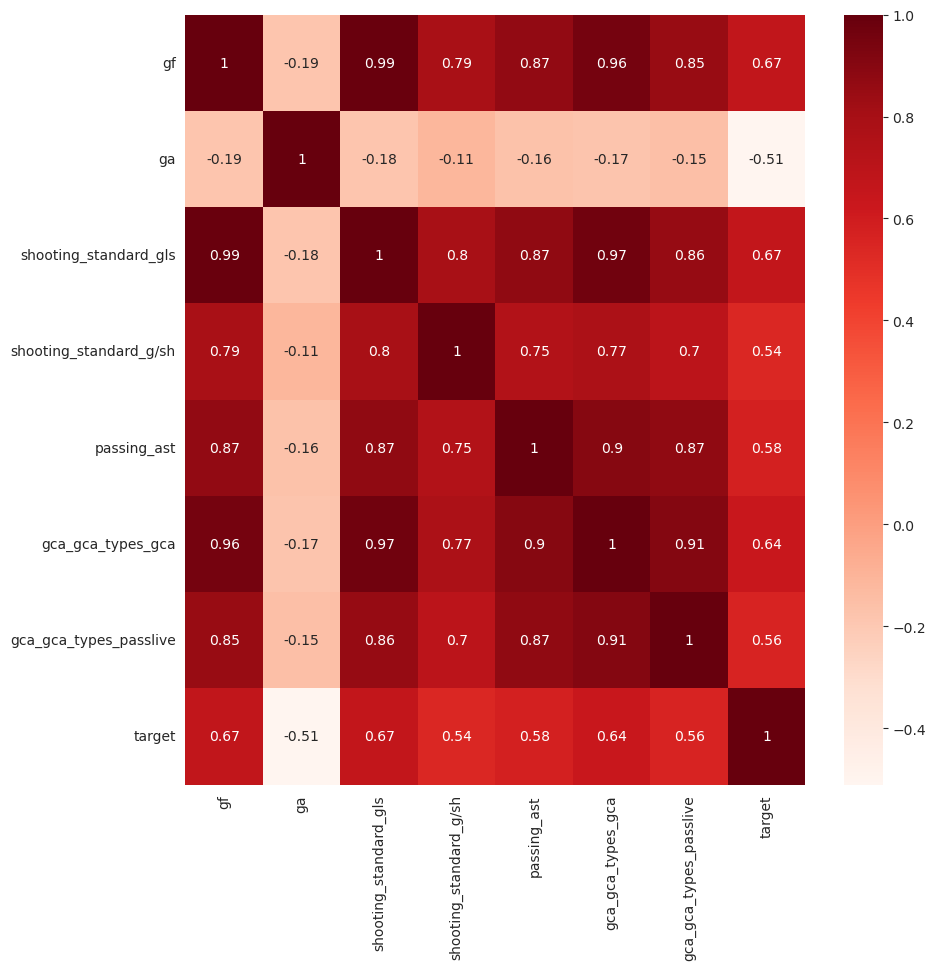

In [2]:
# get the relevant features and see correlation between them
cor = matches_df[relevant_features.index].corr()
# visualize that cor
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()